In [2]:
using ExprOptimization

In [3]:
ruleset = @ruleset begin
    Real = x
    Real = Real * Real
    Real = Real + Real
    Real = Real - Real
    Real = _(Base.rand(1.0:5.0))
end

ExprRules.RuleSet(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), :(_(Base.rand(1.0:5.0)))], Symbol[:Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true], Bool[false, false, false, false, true], Dict(:Real=>[1, 2, 3, 4, 5]))

In [4]:
ground_truth(x) = x + 2
function ExprOptimization.loss(tree::RuleNode)
    ex = get_executable(tree, ruleset)
    los = 0.0
    global x
    for x = -5.0:0.1:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

In [86]:
srand(0)
p = GeneticProgramParams(10, 5, 4, 0.3, 0.3, 0.3)

ExprOptimization.GeneticProgram.GeneticProgramParams(10, 5, 4, [0.3, 0.3, 0.3], ExprOptimization.GeneticProgram.RandomInit(), ExprOptimization.GeneticProgram.TournamentSelection(2))

In [87]:
using ExprOptimization.GeneticProgram
pop = GeneticProgram.initialize(p.initializer, p.pop_size, ruleset, :Real, p.max_depth)

10-element Array{ExprRules.RuleNode,1}:
 ExprRules.RuleNode(3, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(5, 5.0, ExprRules.RuleNode[]), ExprRules.RuleNode(3, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[]), ExprRules.RuleNode(4, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[]), ExprRules.RuleNode(5, 3.0, ExprRules.RuleNode[])])])])                                                                                                                                                                                                                                                                                                                  
 ExprRules.RuleNode(3, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(3, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(4, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[]), ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[])]), ExprRules.RuleNode(2, #NULL, ExprRules.RuleNode[E

In [88]:
losses = zeros(p.pop_size)
best_tree, best_loss = GeneticProgram.evaluate!(pop, losses, pop[1], Inf)

(ExprRules.RuleNode(1, Nullable{Any}(), ExprRules.RuleNode[]), 404.0)

In [89]:
losses

10-element Array{Float64,1}:
   404.0     
   858.5     
   959.5     
   959.5     
  3535.0     
  3838.0     
 11315.3     
 27677.3     
 63983.5     
     4.3764e6

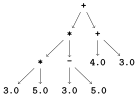

In [101]:
srand(3)
ind1 = GeneticProgram.select(p.selector, pop, losses)
display(ind1, ruleset)

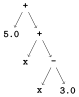

In [102]:
srand(6)
ind2 = GeneticProgram.select(p.selector, pop, losses)
display(ind2, ruleset)

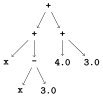

In [103]:
srand(8)
(child1, child2) = GeneticProgram.crossover(ind1, ind2, ruleset)
display(child1, ruleset)


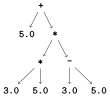

In [104]:
display(child2, ruleset)

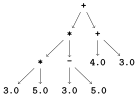

In [105]:
srand(0)
ind3 = GeneticProgram.select(p.selector, pop, losses)
display(ind3, ruleset)

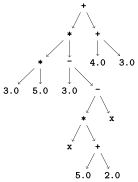

In [110]:
srand(1)
child3 = GeneticProgram.mutation(ind3, ruleset, 4)
display(child3, ruleset)